In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import APL1_functions as AC


In [2]:

# Aspect ratios at different alphas for targets at [10, 15, 20, 25, 30]
aspect_ratios_5e4 = [np.float64(0.09831616565112951), np.float64(0.10327121349007279), np.float64(0.10706065687504354), np.float64(0.11017255234169927), np.float64(0.11283746999727927)]
aspect_ratios_1e4 = [np.float64(0.0983113322886335), np.float64(0.10326955210011893), np.float64(0.10705984330745438), np.float64(0.11017208974059205), np.float64(0.11283714525084576)]
aspect_ratios_5e3 = [np.float64(0.09837673192155198), np.float64(0.10329059228112623), np.float64(0.10706972458054723), np.float64(0.11017786395168641), np.float64(0.11284107521918753)]
aspect_ratios_1e3 = [np.float64(0.09832232359412532), np.float64(0.10327331738297928), np.float64(0.10706164164920995), np.float64(0.1101731464252775), np.float64(0.11283786599310776)]

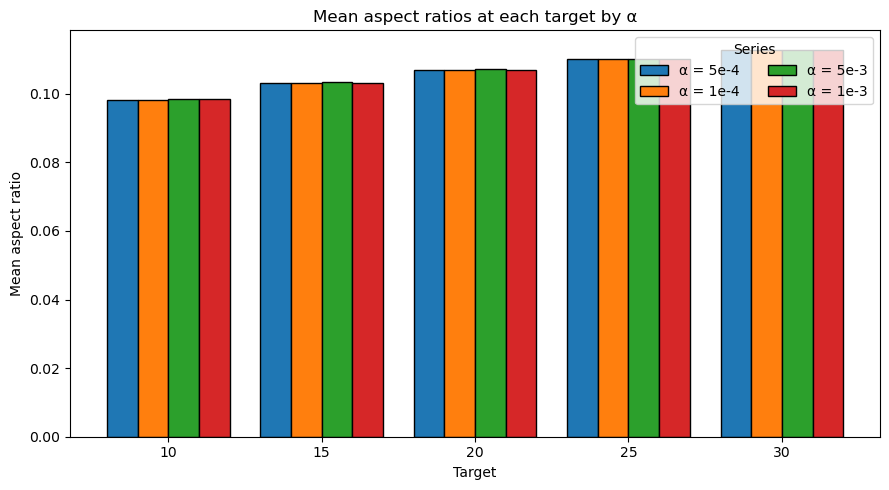

In [3]:

targets = np.array([10, 15, 20, 25, 30])
series = [
    (r'α = 5e-4', aspect_ratios_5e4),
    (r'α = 1e-4', aspect_ratios_1e4),
    (r'α = 5e-3', aspect_ratios_5e3),
    (r'α = 1e-3', aspect_ratios_1e3),
]

x = np.arange(len(targets))
n = len(series)
width = 0.8 / n  # total bar pack width ~0.8

plt.figure(figsize=(9,5))
for i, (label, vals) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, vals, width=width, edgecolor='k', label=label)

plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Mean aspect ratio')
plt.title('Mean aspect ratios at each target by α')
plt.legend(title='Series', ncol=2)
plt.tight_layout()
plt.show()


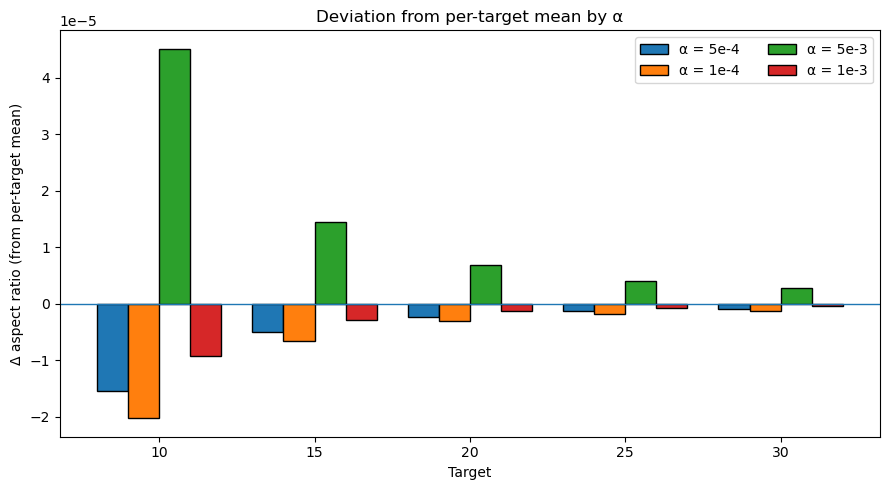

In [4]:
arr = np.vstack([s[1] for s in series])          # shape (4, 5)
grand_mean = arr.mean(axis=0, keepdims=True)     # per-target mean across α
deltas = arr - grand_mean                        # deviations

plt.figure(figsize=(9,5))
for i, (label, _) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, deltas[i], width=width, edgecolor='k', label=label)
plt.axhline(0, linewidth=1)
plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Δ aspect ratio (from per-target mean)')
plt.title('Deviation from per-target mean by α')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


In [5]:
aspect_ratio_5e4 = aspect_ratios_5e4[2]
aspect_ratio_1e4 = aspect_ratios_1e4[2]
aspect_ratio_5e3 = aspect_ratios_5e3[2]
aspect_ratio_1e3 = aspect_ratios_1e3[2]

print(aspect_ratio_5e4)
print(aspect_ratio_1e4)
print(aspect_ratio_5e3)
print(aspect_ratio_1e3)

0.10706065687504354
0.10705984330745438
0.10706972458054723
0.10706164164920995


Aspect Ratio:

$\frac{H}{r}$

Equation for Reynolds Number:

$\mathfrak{R}$ = $\alpha_\nu^{-1}*(\frac{r}{H})^{2}$


In [6]:
Reynolds_5e4 = (aspect_ratio_5e4**(-2)) / (5*10**(-4))
Reynolds_1e4 = (aspect_ratio_1e4**(-2)) / (1*10**(-4))
Reynolds_5e3 = (aspect_ratio_5e3**(-2)) / (5*10**(-3))
Reynolds_1e3 = (aspect_ratio_1e3**(-2)) / (1*10**(-3))


In [7]:
print(Reynolds_5e4)
print(Reynolds_1e4)
print(Reynolds_5e3)
print(Reynolds_1e3)

174489.8576273996
872462.5479950181
17446.030388287392
87243.32382884093


In [8]:
df = pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Disc_Truncation\\Databases\\C1.csv", header=[0,1,2])

In [9]:
display(df['Circumsecondary']['0.3'])

,R,b,c
0,10000.0,-0.79,0.97
1,100000.0,-0.82,0.81
2,1000000.0,-0.83,0.69


In [10]:
display(df['Circumprimary'])

0.1                    0.2                    0.3              \
           R     b     c          R     b     c          R     b     c   
0    10000.0 -0.66  0.84    10000.0 -0.72  0.88    10000.0 -0.76  0.92   
1   100000.0 -0.75  0.68   100000.0 -0.78  0.72   100000.0 -0.80  0.75   
2  1000000.0 -0.78  0.56  1000000.0 -0.80  0.60  1000000.0 -0.81  0.63   

         0.4                    0.5              
           R     b     c          R     b     c  
0    10000.0 -0.77  0.95    10000.0 -0.78  0.94  
1   100000.0 -0.81  0.78   100000.0 -0.81  0.78  
2  1000000.0 -0.82  0.66  1000000.0 -0.82  0.66

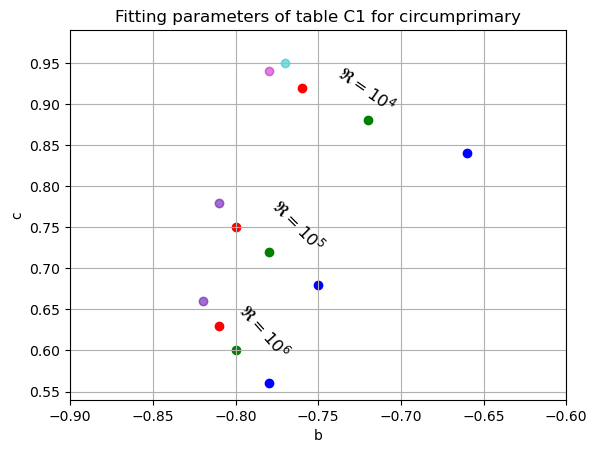

In [11]:
plt.scatter(df['Circumprimary']['0.1']['b'], df['Circumprimary']['0.1']['c'], color='b', label=r'$\mu = 0.1$')
plt.scatter(df['Circumprimary']['0.2']['b'], df['Circumprimary']['0.2']['c'], color='g', label=r'$\mu = 0.2$')
plt.scatter(df['Circumprimary']['0.3']['b'], df['Circumprimary']['0.3']['c'], color='r', label=r'$\mu = 0.3$')
plt.scatter(df['Circumprimary']['0.4']['b'], df['Circumprimary']['0.4']['c'], color='c', alpha=.5, label=r'$\mu = 0.4$')
plt.scatter(df['Circumprimary']['0.5']['b'], df['Circumprimary']['0.5']['c'], color='m', alpha=.5, label=r'$\mu = 0.5$')

plt.xlim(-.9,-.6)
plt.ylim(.54, .99)

plt.text(-0.80, 0.59, r"$\mathfrak{R} = 10^{6}$", rotation=-48, fontsize=12, color="k")
plt.text(-0.78, 0.72, r"$\mathfrak{R} = 10^{5}$", rotation=-45, fontsize=12, color="k")
plt.text(-0.74, 0.89, r"$\mathfrak{R} = 10^{4}$", rotation=-35, fontsize=12, color="k")


plt.xlabel('b')
plt.ylabel('c')
plt.title('Fitting parameters of table C1 for circumprimary')
plt.tight_layout
plt.grid()
plt.show()

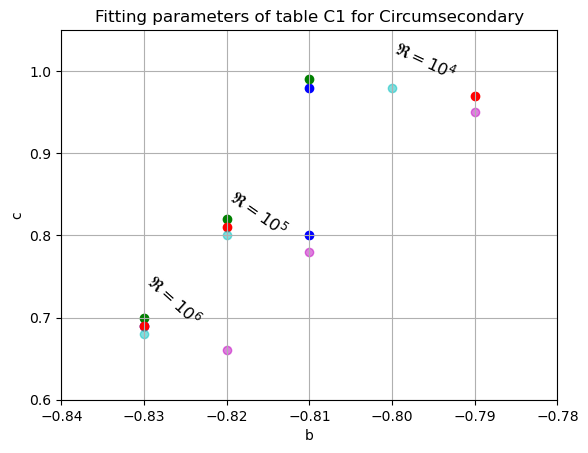

In [12]:
plt.scatter(df['Circumsecondary']['0.1']['b'], df['Circumsecondary']['0.1']['c'], color='b', label=r'$\mu = 0.1$')
plt.scatter(df['Circumsecondary']['0.2']['b'], df['Circumsecondary']['0.2']['c'], color='g', label=r'$\mu = 0.2$')
plt.scatter(df['Circumsecondary']['0.3']['b'], df['Circumsecondary']['0.3']['c'], color='r', label=r'$\mu = 0.3$')
plt.scatter(df['Circumsecondary']['0.4']['b'], df['Circumsecondary']['0.4']['c'], color='c', alpha=.5, label=r'$\mu = 0.4$')
plt.scatter(df['Circumsecondary']['0.5']['b'], df['Circumsecondary']['0.5']['c'], color='m', alpha=.5, label=r'$\mu = 0.5$')

plt.xlim(-.84,-.78)
plt.ylim(.6, 1.05)

plt.text(-0.83, 0.69, r"$\mathfrak{R} = 10^{6}$", rotation=-42, fontsize=12, color="k")
plt.text(-0.82, 0.8, r"$\mathfrak{R} = 10^{5}$", rotation=-35, fontsize=12, color="k")
plt.text(-0.80, .99, r"$\mathfrak{R} = 10^{4}$", rotation=-25, fontsize=12, color="k")


plt.xlabel('b')
plt.ylabel('c')
plt.title('Fitting parameters of table C1 for Circumsecondary')
plt.tight_layout
plt.grid()
plt.show()

define your function "truncation_radius" which 
gets in input M1, M2, abin, ebin, alpha 
    
    calculate R eggleton (DONE)
    
    calculates the Re given H/r found before (DONE)
    
    Fits b and c as a function of Re (table c1) for the 5 values of mu (i.e. 5 different fits) (Done)
    
    interpolates at the given Re, so you get 5 values of b and five values of c (which differ in mu:0.1,0.2,0.3,0.4,0.5 as in the table) (Done)
    
    fits these values of b and c to get the dependance on mu 
    
    interpolate such fits at the given mu=M2/M1+M2 so you get one value of b and one value of c
    
    finally, you use formula 3 with the b and c found + the other binary parameters 

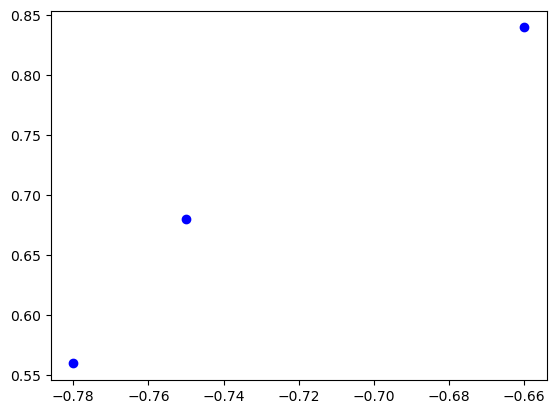

In [13]:
plt.scatter(df['Circumprimary']['0.1']['b'], df['Circumprimary']['0.1']['c'], color='b', label=r'$\mu = 0.1$')
# plt.scatter(df['Circumprimary']['0.1']['b'], [10e6, 10e5, 10e4], color='r', label=r'$\mu = 0.1$')


# fig, ax1 = plt.subplots() 

# color = 'tab:red'
# ax1.set_xlabel('b') 
# ax1.set_ylabel('c', color = color) 
# ax1.scatter(df['Circumprimary']['0.1']['b'], df['Circumprimary']['0.1']['c'], color = color) 
# ax1.tick_params(axis ='y', labelcolor = color) 

# # Adding Twin Axes to plot using dataset_2
# ax2 = ax1.twinx() 

# color = 'tab:blue'
# ax2.set_ylabel('R', color = color) 
# ax2.scatter(df['Circumprimary']['0.1']['b'], [10e6, 10e5, 10e4], color = color) 
# ax2.tick_params(axis ='y', labelcolor = color) 

# # Adding title
# plt.title('Use different y-axes on the left and right of a Matplotlib plot', fontweight ="bold") 

# # Show plot
# plt.show() 

In [14]:
b = df['Circumprimary']['0.1']['b']
c = df['Circumprimary']['0.1']['c']

p0 = np.array([b.iloc[0], c.iloc[0], 1e6], dtype=float)
p1 = np.array([b.iloc[1], c.iloc[1], 1e5], dtype=float)
p2 = np.array([b.iloc[2], c.iloc[2], 1e4], dtype=float)

half_diff_p1_p0 = (p1 - p0) / 2          # your intended result (half the displacement)
midpoint_p1_p0  = (p1 + p0) / 2          # the point halfway between them
point_halfway_from_p0_p1 = p0 + half_diff_p1_p0

half_diff_p2_p1 = (p2 - p1) / 2          # your intended result (half the displacement)
midpoint_p2_p1  = (p2 + p1) / 2          # the point halfway between them
point_halfway_from_p1_p2 = p1 + half_diff_p2_p1

print(half_diff_p1_p0)
print(midpoint_p1_p0)
print(point_halfway_from_p0_p1)

print(half_diff_p2_p1)
print(midpoint_p2_p1)
print(point_halfway_from_p1_p2)

[-4.5e-02 -8.0e-02 -4.5e+05]
[-7.05e-01  7.60e-01  5.50e+05]
[-7.05e-01  7.60e-01  5.50e+05]
[-1.5e-02 -6.0e-02 -4.5e+04]
[-7.65e-01  6.20e-01  5.50e+04]
[-7.65e-01  6.20e-01  5.50e+04]


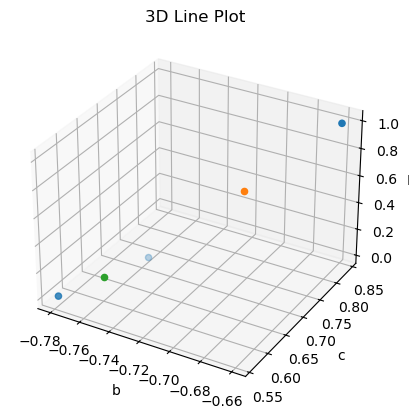

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df['Circumprimary']['0.1']['b'], df['Circumprimary']['0.1']['c'], [1e6, 1e5, 1e4], 'green')
ax.scatter3D(point_halfway_from_p0_p1[0], point_halfway_from_p0_p1[1], point_halfway_from_p0_p1[2], 'blue')
ax.scatter3D(point_halfway_from_p1_p2[0], point_halfway_from_p1_p2[1], point_halfway_from_p1_p2[2], 'blue')
ax.set_title('3D Line Plot')
ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('Re')
plt.show()

In [16]:
# def R_egg(M1, M2, abin):
#     q = [M1/M2, M2/M1]
#     R_eggi = [] # Contains R eggleton for q1=M1/M2 and q2=M2/M1
    
#     for i in [0,1]:
#         R_egg = (0.49*q[i]**(2/3))*abin/(0.6*q[i]**(2/3)+np.log(1+q[i]**(1/3)))
#         R_eggi.append(R_egg)
        
        
#     return R_eggi

# def Reynolds(alpha, aspect_ratio):
#     Re = [] # Contains Reynolds numbers for given alpha and aspect ratio
#     for ii in range(4):
#         re = aspect_ratio[ii]**(-2) / alpha[ii]
#         Re.append(re)
        
#     return Re
    

alpha = [5e-4, 1e-4, 5e-3, 1e-3]
aspect_ratio = [aspect_ratio_5e4, aspect_ratio_1e4, aspect_ratio_5e3, aspect_ratio_1e3]


Re = AC.Reynolds(alpha, aspect_ratio)

print(Re)

b = df['Circumprimary']['0.1']['b']
c = df['Circumprimary']['0.1']['c']



p0 = np.array([b.iloc[0], c.iloc[0], 1e4], dtype=float)
p1 = np.array([b.iloc[1], c.iloc[1], 1e5], dtype=float)
p2 = np.array([b.iloc[2], c.iloc[2], 1e6], dtype=float)


pts = np.vstack((p0, p1, p2))
"""

format
pts[row][column]
column indices: 0 = b, 1 = c, 2 = Re


"""
print(pts[0])

[np.float64(174489.8576273996), np.float64(872462.5479950181), np.float64(17446.030388287392), np.float64(87243.32382884093)]
[-6.6e-01  8.4e-01  1.0e+04]


In [17]:
mu = ['0.1', '0.2', '0.3', '0.4', '0.5']

b = []
c = []
R = df['Circumprimary']['0.1']['R']
for ii in range(len(mu)):
    bs = df['Circumprimary'][mu[ii]]['b']
    cs = df['Circumprimary'][mu[ii]]['c']
    b.append(bs)
    c.append(cs)
    




In [18]:
    
# def make_pts(mu_indices):  
#     """
    
#     ok so you're not actually giving the mu value, but instead giving the indice that relates to each mu value.
#     i.e. a mu of 0.1 would be indice [0]
    
#     """
#     p0 = np.array([b[mu_indices][0], c[mu_indices][0], 1e4], dtype=float)
#     p1 = np.array([b[mu_indices][1], c[mu_indices][1], 1e5], dtype=float)
#     p2 = np.array([b[mu_indices][2], c[mu_indices][2], 1e6], dtype=float)
#     pts = np.vstack((p0, p1, p2))
    
#     return pts

index = [0, 1, 2, 3, 4]
points = AC.make_pts(b, c, index[0])

print("matrix of points is: " + str(points))
print('')
print("row of points is: " + str(points[0]))
print('')
print("b is: " + str(points[0][0]))



matrix of points is: [[-6.6e-01  8.4e-01  1.0e+04]
 [-7.5e-01  6.8e-01  1.0e+05]
 [-7.8e-01  5.6e-01  1.0e+06]]

row of points is: [-6.6e-01  8.4e-01  1.0e+04]

b is: -0.66


In [19]:
# def Linear_interp(Re, mu_indices):
#     if Re > make_pts(mu_indices)[0][2] and Re < make_pts(mu_indices)[1][2]: # if the given reynolds number is between the first two points, then b and c are can be interpolated
#         t = (Re-make_pts(mu_indices)[0][2])/(make_pts(mu_indices)[1][2]-make_pts(mu_indices)[0][2])
#         b_new = (1-t)*make_pts(mu_indices)[0][0]+t*make_pts(mu_indices)[1][0] 
#         c_new = (1-t)*make_pts(mu_indices)[0][1]+t*make_pts(mu_indices)[1][1] 
        
#         return (b_new, c_new)
#     elif Re > make_pts(mu_indices)[1][2] and Re < make_pts(mu_indices)[2][2]:   # if the given reynolds number is between the second and third points, then b and c are can be interpolated
#         t = (Re-make_pts(mu_indices)[1][2])/(make_pts(mu_indices)[2][2]-make_pts(mu_indices)[1][2])
#         b_new = (1-t)*make_pts(mu_indices)[1][0]+t*make_pts(mu_indices)[2][0] 
#         c_new = (1-t)*make_pts(mu_indices)[1][1]+t*make_pts(mu_indices)[2][1] 
        
#         return (b_new, c_new)
#     elif Re == make_pts(mu_indices)[0][2]:    # if the given reynolds number equals the first pt, then b and c are known
#         b_new = make_pts(mu_indices)[0][0]
#         c_new = make_pts(mu_indices)[0][1]
#         return (b_new, c_new)
#     elif Re == make_pts(mu_indices)[1][2]:    # if the given reynolds number equals the second pt, then b and c are known
#         b_new = make_pts(mu_indices)[1][0]
#         c_new = make_pts(mu_indices)[1][1]
#         return (b_new, c_new)
#     elif Re == make_pts(mu_indices)[2][2]:    # if the given reynolds number equals the third pt, then b and c are known
#         b_new = make_pts(mu_indices)[2][0]
#         c_new = make_pts(mu_indices)[2][1]
#         return (b_new, c_new)
#     else:                       # if conditions above fail, return error
#         b_new = -27
#         c_new = -27
#         return (b_new, c_new)
    
    
new_points = AC.Linear_interp(Re[0], b, c, index[0])
print(new_points)


# (np.float64(-0.7535636452222089), np.float64(0.6657454191111646))

(np.float64(-0.7524829952542467), np.float64(0.6700680189830134))


In [54]:
# def Quadratic_interp(Re, mu_indices):
#     if Re > make_pts(mu_indices)[0][2] and Re < make_pts(mu_indices)[2][2]: # Interps new values for b and c based on a given reynolds number via the Lagrange polynomial interpolation procedure
#         L0 = ((Re-make_pts(mu_indices)[1][2])*(Re-make_pts(mu_indices)[2][2]))/((make_pts(mu_indices)[0][2]-make_pts(mu_indices)[1][2])*(make_pts(mu_indices)[0][2]-make_pts(mu_indices)[2][2]))
#         L1 = ((Re-make_pts(mu_indices)[0][2])*(Re-make_pts(mu_indices)[2][2]))/((make_pts(mu_indices)[1][2]-make_pts(mu_indices)[0][2])*(make_pts(mu_indices)[1][2]-make_pts(mu_indices)[2][2]))
#         L2 = ((Re-make_pts(mu_indices)[0][2])*(Re-make_pts(mu_indices)[1][2]))/((make_pts(mu_indices)[2][2]-make_pts(mu_indices)[0][2])*(make_pts(mu_indices)[2][2]-make_pts(mu_indices)[1][2]))
        
#         b_new = make_pts(mu_indices)[0][0]*L0 + make_pts(mu_indices)[1][0] *L1 + make_pts(mu_indices)[2][0]*L2
#         c_new = make_pts(mu_indices)[0][1]*L0 + make_pts(mu_indices)[1][1] *L1 + make_pts(mu_indices)[2][1]*L2
        
#         return (b_new, c_new)
#     elif Re == make_pts(mu_indices)[0][2]:    # if the given reynolds number equals the first pt, then b and c are known
#         b_new = make_pts(mu_indices)[0][0]
#         c_new = make_pts(mu_indices)[0][1]
#         return (b_new, c_new)
#     elif Re == make_pts(mu_indices)[2][2]:    # if the given reynolds number equals the third pt, then b and c are known
#         b_new = make_pts(mu_indices)[2][0]
#         c_new = make_pts(mu_indices)[2][1]
#         return (b_new, c_new)
#     else:                       # if conditions above fail, return error
#         b_new = -27
#         c_new = -27
#         return (b_new, c_new)
    
    
new_points = AC.Quadratic_interp(Re[0], b, c, index[0])
print(new_points)

# def quad_interp_pts(Re, b, c, mu_indices):
#     pts = Quadratic_interp(Re, b, c, mu_indices)
    
        
#     b_new = pts[0]
#     c_new = pts[1]
#     return(b_new, c_new)
    # return(interp_pts)
    
p = AC.quad_interp_pts(Re[0], b, c, index[0])

print(p)

print(AC.quad_interp_pts(Re[0], b, c, index[0])[0])



new_R = list(reversed(R))






# plt.scatter(interp_pts(Re[0], index[0])[0], interp_pts(Re[0], index[0])[1])


(np.float64(-0.8125258186981513), np.float64(0.5679262043887847))
(np.float64(-0.8125258186981513), np.float64(0.5679262043887847))
-0.8125258186981513


Exponential function coefficients:
[ 1.01134691 -3.31247895]
Covariance of coefficients:
[[0.42189592 0.55772227]
 [0.55772227 0.73991113]]


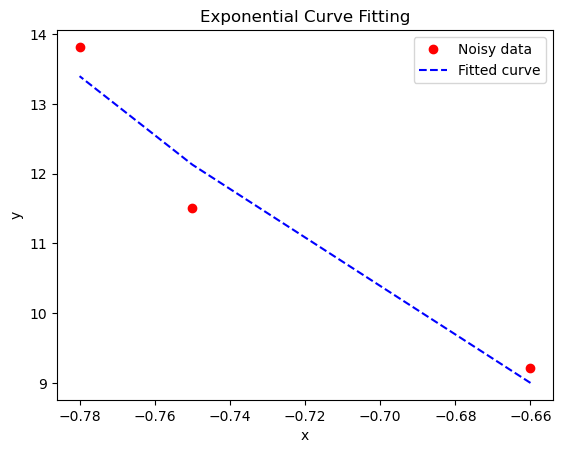

In [63]:
x = b[0]
y = np.log(R)

def test_exp(x, a, b):
    return a * np.exp(b * x)

# Fit model to data
param, param_cov = curve_fit(test_exp, x, y)

# Print optimized parameters and their covariance
print("Exponential function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

# Generate fitted y values
ans = param[0] * np.exp(param[1] * x)

# Plot original data and fitted curve
plt.plot(x, y, 'o', color='red', label='Noisy data')
plt.plot(x, ans, '--', color='blue', label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve Fitting')
plt.legend()
plt.show()

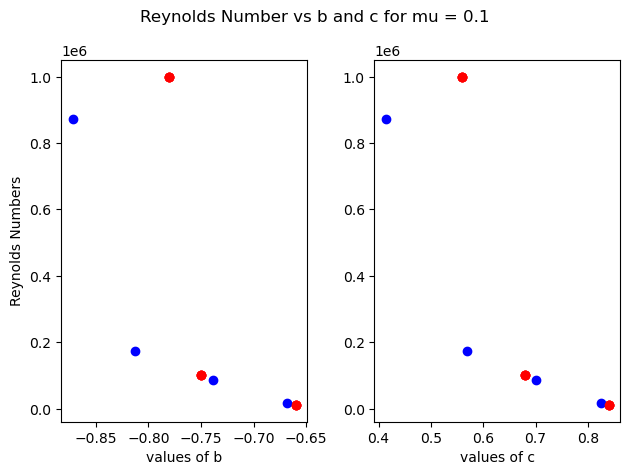

In [ ]:



for ii in range(len(Re)):
    plt.subplot(1, 2, 1)
    plt.scatter(b[0], R, color='red', label='Known vals')
    plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[0], Re[ii], color='blue', label='interped vals')
    plt.xlabel('values of b')
    plt.ylabel('Reynolds Numbers')




    plt.subplot(1, 2, 2)
    plt.scatter(c[0], R, color='red', label='Known vals')
    plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[1], Re[ii], color='blue', label='interped vals')
    plt.xlabel('values of c')
    # plt.ylabel('Reynolds Numbers')


plt.suptitle(f'Reynolds Number vs b and c for mu = {mu[0]}', y=0.98)
# plt.suptitle(f'Red = Known Vals, Blue = Interp Vals', y=0.9)
plt.tight_layout()



In [21]:
print(new_points)

(np.float64(-0.7524829952542467), np.float64(0.6700680189830134))


In [22]:
# def interp_pts(Re, b, c, mu_indices):
#     pts = Linear_interp(Re, b, c, mu_indices)
    
        
#     b_new = pts[0]
#     c_new = pts[1]
#     return(b_new, c_new)
    # return(interp_pts)
    
p = AC.linear_interp_pts(Re[0], b, c, index[0])

print(p)

print(AC.linear_interp_pts(Re[0], b, c, index[0])[0])

(np.float64(-0.7524829952542467), np.float64(0.6700680189830134))
-0.7524829952542467


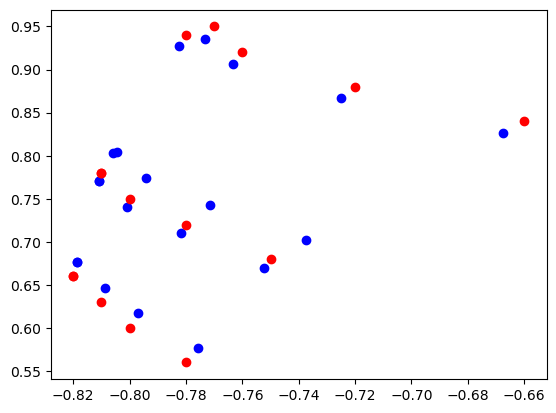

In [36]:
for jj in range(len(Re)):
    for ii in range(len(index)):
        plt.scatter(AC.linear_interp_pts(Re[jj], b, c, index[ii])[0], AC.linear_interp_pts(Re[jj], b, c, index[ii])[1], color='blue')
    
plt.scatter(b, c, color='red')
# plt.scatter(AC.linear_interp_pts(Re[0], b, c, index[0])[0], AC.linear_interp_pts(Re[0], b, c, index[0])[1], color='green')


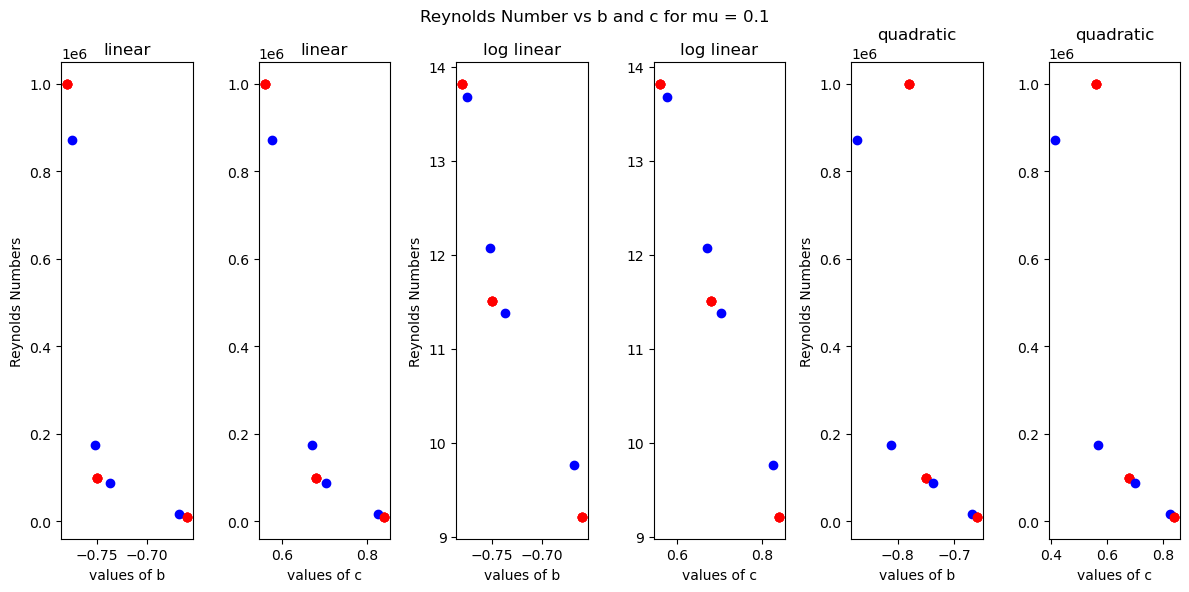

In [68]:
# new_R = list(reversed(R))
plt.figure(figsize=(12, 6))

for ii in range(len(Re)):
    plt.subplot(1, 6, 1)
    plt.scatter(b[0], R, color='red', label='Known vals')
    plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[0])[0], Re[ii], color='blue', label='interped vals')
    plt.xlabel('values of b')
    plt.ylabel('Reynolds Numbers')
    plt.title('linear')




    plt.subplot(1, 6, 2)
    plt.scatter(c[0], R, color='red', label='Known vals')
    plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[0])[1], Re[ii], color='blue', label='interped vals')
    plt.xlabel('values of c')
    plt.title('linear')
    # plt.ylabel('Reynolds Numbers')

for ii in range(len(Re)):
    plt.subplot(1, 6, 3)
    plt.scatter(b[0], np.log(R), color='red', label='Known vals')
    plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[0])[0], np.log(Re[ii]), color='blue', label='interped vals')
    plt.xlabel('values of b')
    plt.ylabel('Reynolds Numbers')
    plt.title('log linear')




    plt.subplot(1, 6, 4)
    plt.scatter(c[0], np.log(R), color='red', label='Known vals')
    plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[0])[1], np.log(Re[ii]), color='blue', label='interped vals')
    plt.xlabel('values of c')
    plt.title('log linear')
    # plt.ylabel('Reynolds Numbers')




for ii in range(len(Re)):
    plt.subplot(1, 6, 5)
    plt.scatter(b[0], R, color='red', label='Known vals')
    plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[0], Re[ii], color='blue', label='interped vals')
    plt.xlabel('values of b')
    plt.ylabel('Reynolds Numbers')
    plt.title('quadratic')




    plt.subplot(1, 6, 6)
    plt.scatter(c[0], R, color='red', label='Known vals')
    plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[1], Re[ii], color='blue', label='interped vals')
    plt.xlabel('values of c')
    plt.title('quadratic')
    # plt.ylabel('Reynolds Numbers')
    


plt.suptitle(f'Reynolds Number vs b and c for mu = {mu[0]}', y=0.98)
# plt.suptitle(f'Red = Known Vals, Blue = Interp Vals', y=0.9)
plt.tight_layout()





# plt.scatter(interp_pts(Re[0], index[0])[0], interp_pts(Re[0], index[0])[1])


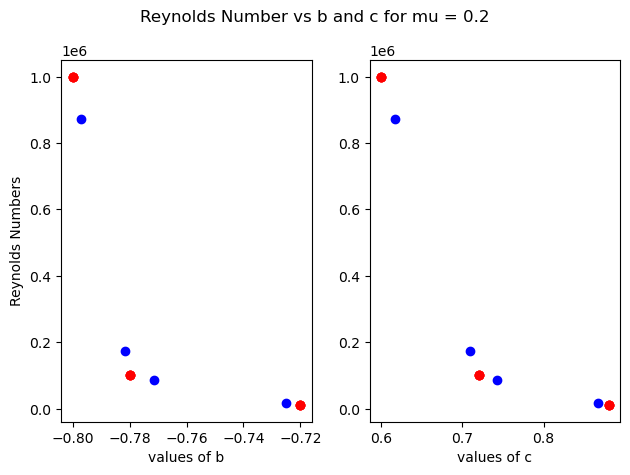

In [41]:
# new_R = list(reversed(R))


for ii in range(len(Re)):
    plt.subplot(1, 2, 1)
    plt.scatter(b[1], R, color='red', label='Known vals')
    plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[1])[0], Re[ii], color='blue', label='interped vals')
    plt.xlabel('values of b')
    plt.ylabel('Reynolds Numbers')




    plt.subplot(1, 2, 2)
    plt.scatter(c[1], R, color='red', label='Known vals')
    plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[1])[1], Re[ii], color='blue', label='interped vals')
    plt.xlabel('values of c')
    # plt.ylabel('Reynolds Numbers')


plt.suptitle(f'Reynolds Number vs b and c for mu = {mu[1]}', y=0.98)
# plt.suptitle(f'Red = Known Vals, Blue = Interp Vals', y=0.9)
plt.tight_layout()





# plt.scatter(interp_pts(Re[0], index[0])[0], interp_pts(Re[0], index[0])[1])


In [ ]:

"""

Original interpolation function
    
"""

# def Interps(pts, Re):
#     if Re[0] > pts[0][2] and Re[0] < pts[1][2]: # if the given reynolds number is between the first two points, then b and c are can be interpolated
#         t = (Re[0]-pts[0][2])/(pts[1][2]-pts[0][2])
#         b_new = (1-t)*pts[0][0]+t*pts[1][0] 
#         c_new = (1-t)*pts[0][1]+t*pts[1][1] 
        
#         return (b_new, c_new)
#     elif Re[0] > pts[1][2] and Re[0] < pts[2][2]:   # if the given reynolds number is between the second and third points, then b and c are can be interpolated
#         t = (Re[0]-pts[1][2])/(pts[2][2]-pts[1][2])
#         b_new = (1-t)*pts[1][0]+t*pts[2][0] 
#         c_new = (1-t)*pts[1][1]+t*pts[2][1] 
        
#         return (b_new, c_new)
#     elif Re[0] == pts[0][2]:    # if the given reynolds number equals the first pt, then b and c are known
#         b_new = pts[0][0]
#         c_new = pts[0][1]
#         return (b_new, c_new)
#     elif Re[0] == pts[1][2]:    # if the given reynolds number equals the second pt, then b and c are known
#         b_new = pts[1][0]
#         c_new = pts[1][1]
#         return (b_new, c_new)
#     elif Re[0] == pts[2][2]:    # if the given reynolds number equals the third pt, then b and c are known
#         b_new = pts[2][0]
#         c_new = pts[2][1]
#         return (b_new, c_new)
#     else:                       # if conditions above fail, return error
#         b_new = -27
#         c_new = -27
#         return (b_new, c_new)

# new_pts = Interps(pts, Re)
# print(new_pts)



(np.float64(-0.7524829952542467), np.float64(0.6700680189830134))


(np.float64(-0.7524829952542467), np.float64(0.6700680189830134))


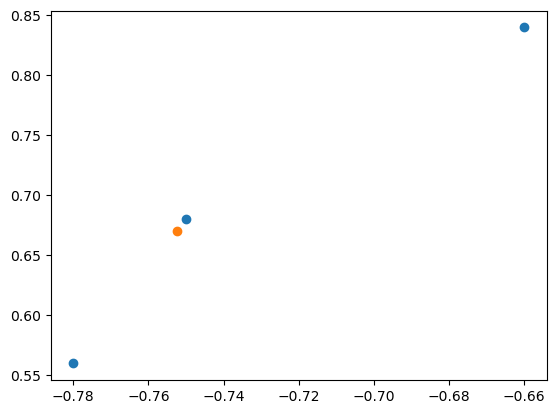

In [86]:
plt.scatter(b[0], c[0])
plt.scatter(new_pts[0], new_pts[1])

In [84]:
R = Reynolds(alpha, aspect_ratio)
print(R)

[174489.8576273996, 980531.1403374824, 15707.083923988659, 87243.32382884093]


In [85]:
def truncation_radius(M1, M2, abin, ebin, alpha):
    R_eggi = R_egg(M1, M2, abin)
    
    aspect_ratio = [aspect_ratio_5e4, aspect_ratio_1e4, aspect_ratio_5e3, aspect_ratio_1e3]
    Re = Reynolds(alpha, aspect_ratio)
    